In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
!wget https://github.com/forero/abacus/raw/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat

--2019-02-13 11:41:16--  https://github.com/forero/abacus/raw/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/forero/abacus/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat [following]
--2019-02-13 11:41:17--  https://raw.githubusercontent.com/forero/abacus/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 779142 (761K) [text/plain]
Saving to: ‘sphere_data_cut_0.dat’

sphere_data_cut_0.d 100%[===================>] 760,88K  1008KB/s 

In [16]:
seed = 20190213
np.random.seed(seed)
Radius = 100
VOID_TYPE = "REAL"
N = 10000

In [4]:
def sph_random_point():
    u = np.random.rand()
    x1 = np.random.normal()
    x2 = np.random.normal()
    x3 = np.random.normal()
    
    norm = np.sqrt( x1**2 + x2**2 + x3**2)
    x1 /= norm
    x2 /= norm
    x3 /= norm
    
    r = Radius * u ** (1/3)
    
    return  [r*x1,r*x2,r*x3] 

In [5]:
RC = np.zeros([N,3])
for x in RC:
    x += sph_random_point()
np.savetxt("rnd_sph_cat_R100_seed20190213.cat", RC)


OC = np.loadtxt("./sphere_data_cut_0.dat")
OC = OC + 400


FC = np.vstack([RC,OC])
np.savetxt("FC_N{}_{}.cat".format(N,VOID_TYPE), FC)

<IPython.core.display.Javascript object>


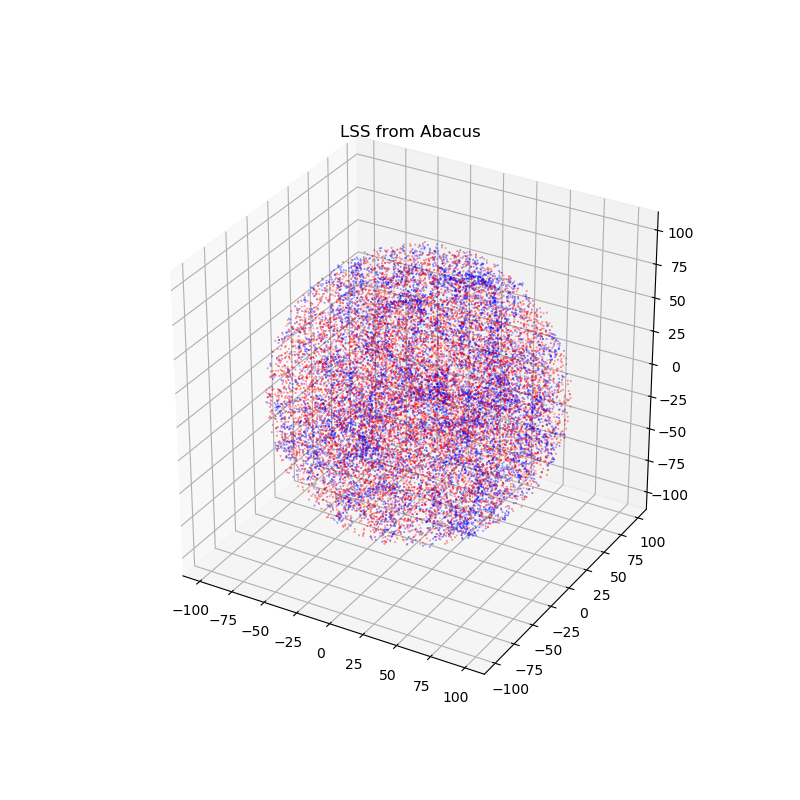

Text(0.5,0.92,'LSS from Abacus')

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


X = OC[:,0]
Y = OC[:,1]
Z = OC[:,2]

ax.scatter(X, Y, Z, c="blue", s=0.1)

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

ax.scatter(X, Y, Z, c="red", s=0.1)


plt.title("LSS from Abacus")




In [25]:
!make NPARTICLES=$N VOID_TYPE=$VOID_TYPE 

Input File FC_N10000_REAL.cat
cp FC_N10000_REAL.cat 9b0UOmYhqK

Calling NGL
/home/filipo/master_thesis/ngl-beta/build/binsrc/./getNeighborGraph -i 9b0UOmYhqK -d 3 -m BSkeleton -b 1.0c > FC_N10000_REAL_Beta1.0.bsk
Ellapsed time: 1717.670898 s.
Output file: FC_N10000_REAL_Beta1.0.bsk
Deleting auxiliar file
rm 9b0UOmYhqK


In [28]:
!ls -lt

total 5680
-rw-rw-r-- 1 filipo filipo  454338 feb 13 14:27 Untitled.ipynb
-rw-rw-r-- 1 filipo filipo 1503738 feb 13 14:25 FC_N10000_REAL_Beta1.0.bsk
-rw-rw-r-- 1 filipo filipo 1528490 feb 13 13:44 FC_N10000_REAL.cat
-rw-rw-r-- 1 filipo filipo     762 feb 13 13:36 Makefile
-rw-rw-r-- 1 filipo filipo     751 feb 13 13:35 Makefile~
-rw-rw-r-- 1 filipo filipo  764926 feb 13 13:32 rnd_sph_cat_R100_seed20190213.cat
-rw-rw-r-- 1 filipo filipo  764926 feb 13 13:30 rnd_sph_cat_R100.cat
-rw-rw-r-- 1 filipo filipo  779142 feb 13 11:41 sphere_data_cut_0.dat


# Loading the Full Catalog Beta-Skeleton graph

In [51]:
fcBSkel = np.loadtxt("FC_N10000_REAL_Beta1.0.bsk")
fcBSkel.shape

(139504, 2)

In [49]:
index = np.where(fcBSkel[:,0] < N)

first_filter = np.array(fcBSkel[index]).astype(int)

index = np.where( first_filter[:,1] >= N )[0]

droplist_raw = first_filter[index,0]
droplist = set(droplist_raw)

print( "First filter shape:", first_filter.shape, 
      "\nHow many of them have direct connections with galaxies", len(droplist) )

First filter shape: (76673, 2) 
How many of them have direct connections with galaxies 8938


In [52]:
rndmcat_index = set(range(N))

candidates = rndmcat_index.difference(droplist)
candidates = list(candidates)
void_cat = FC[candidates]

<IPython.core.display.Javascript object>


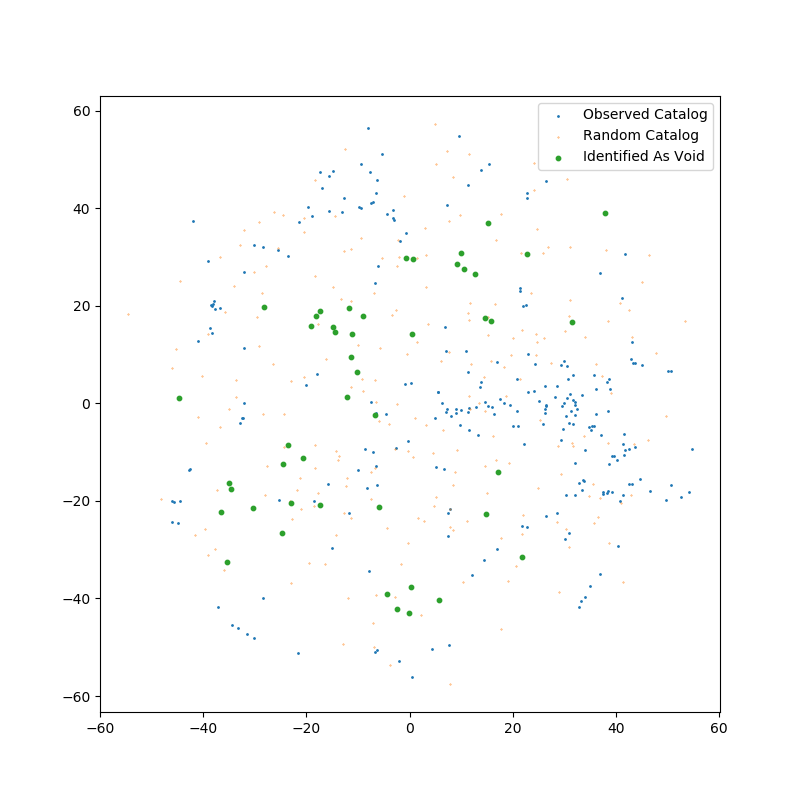

<IPython.core.display.Javascript object>


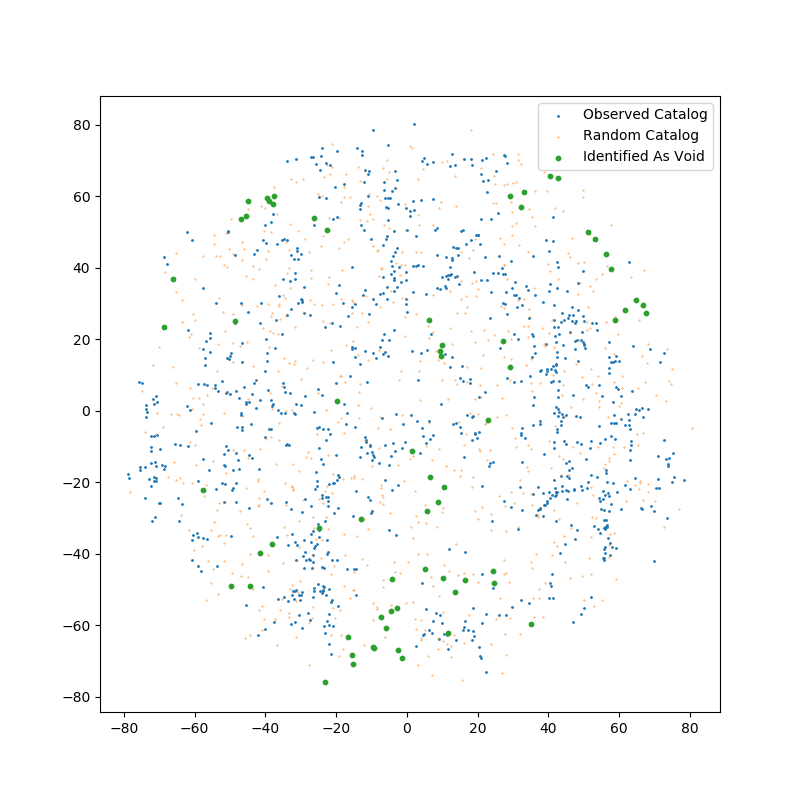

<IPython.core.display.Javascript object>


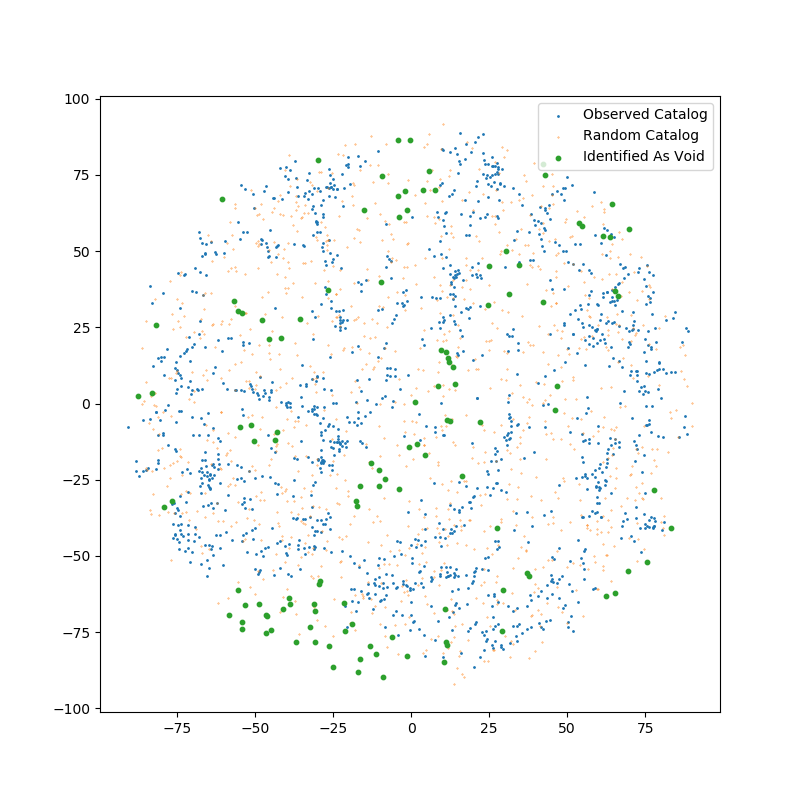

<IPython.core.display.Javascript object>


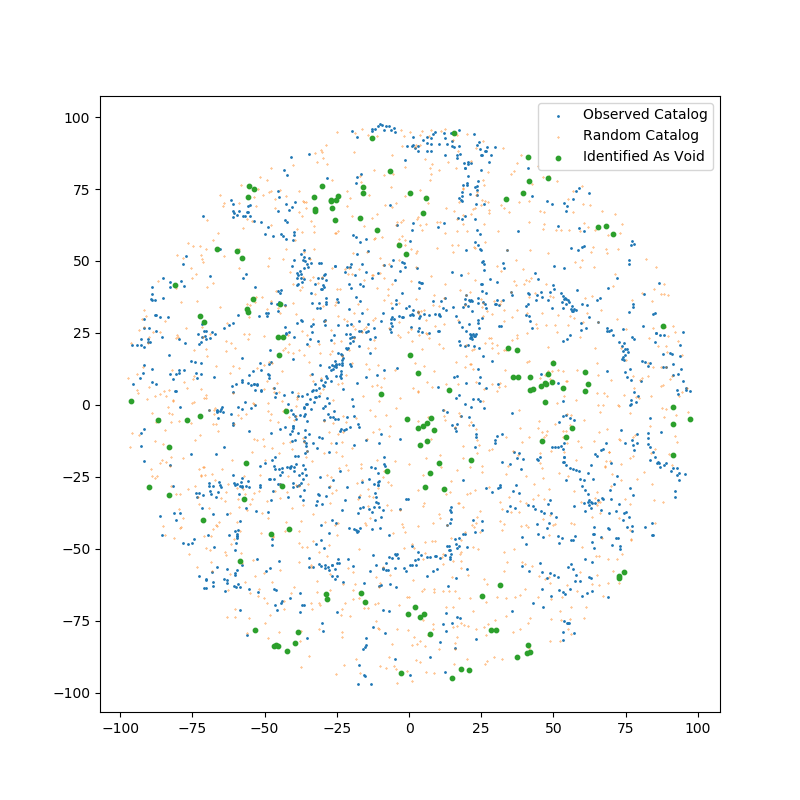

<IPython.core.display.Javascript object>


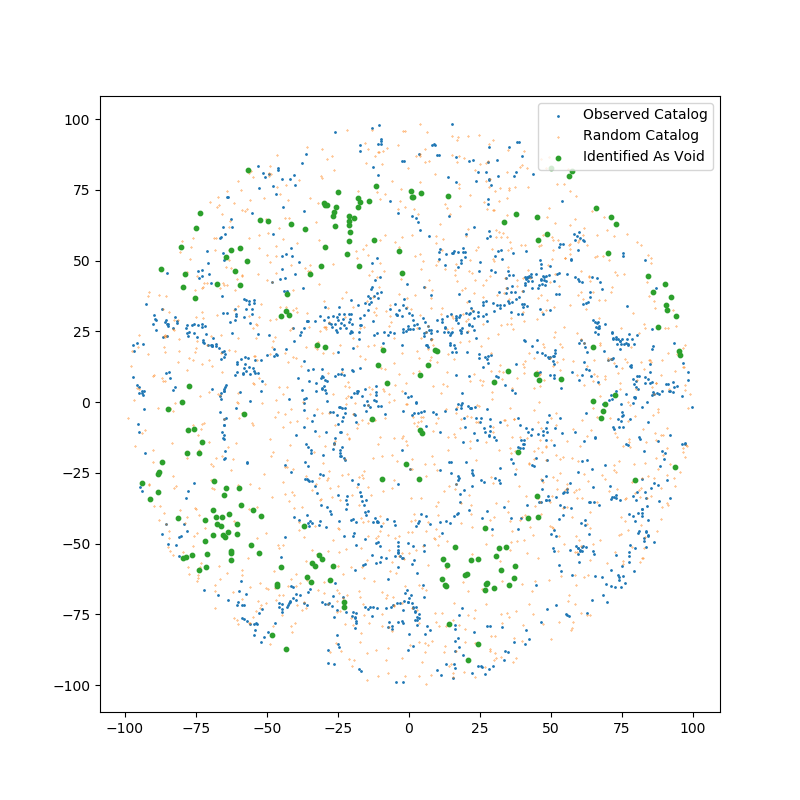

<IPython.core.display.Javascript object>


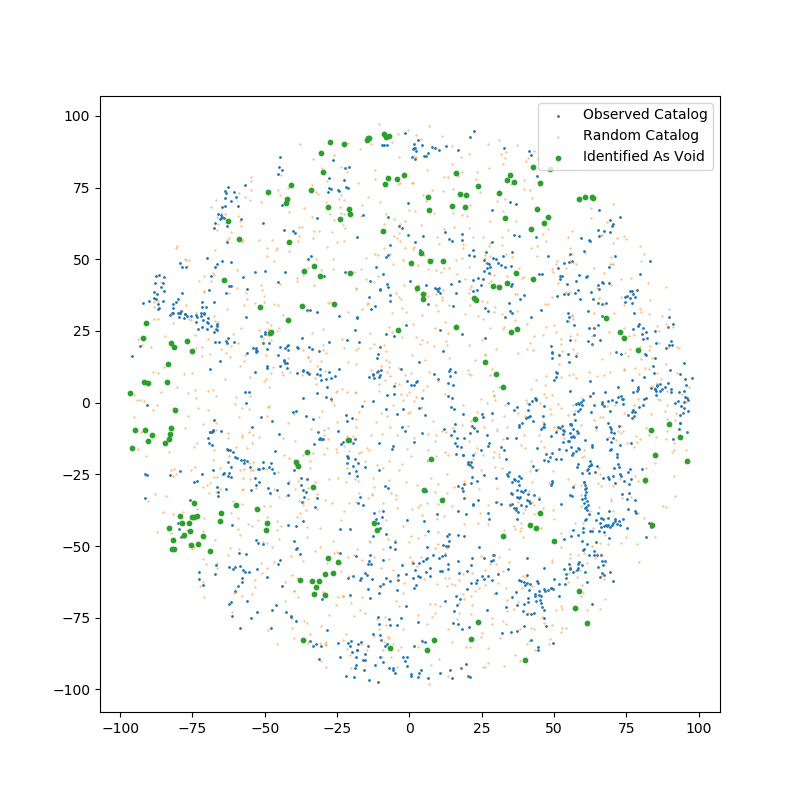

<IPython.core.display.Javascript object>


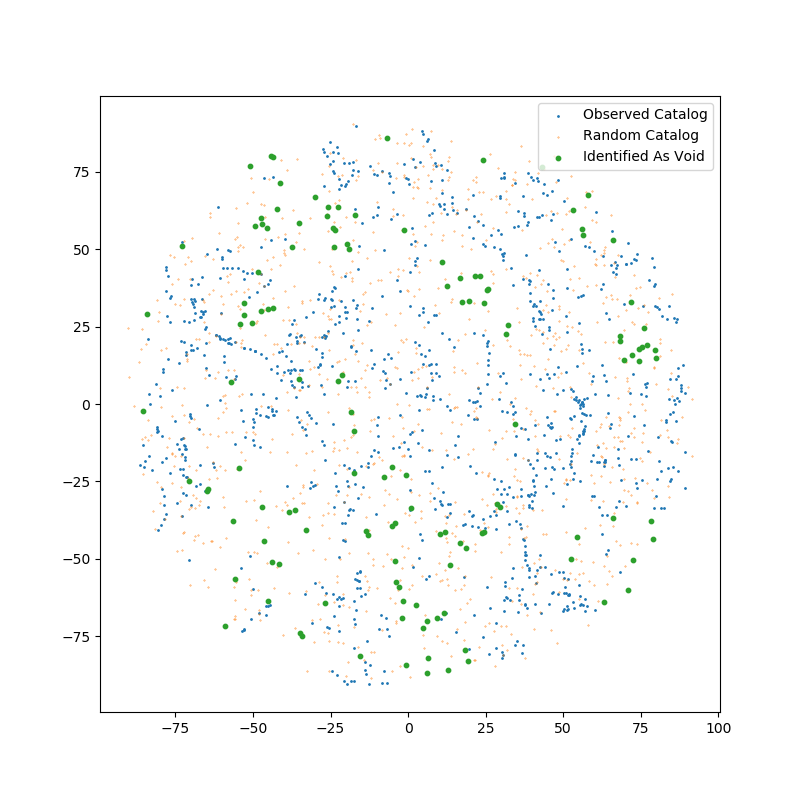

<IPython.core.display.Javascript object>


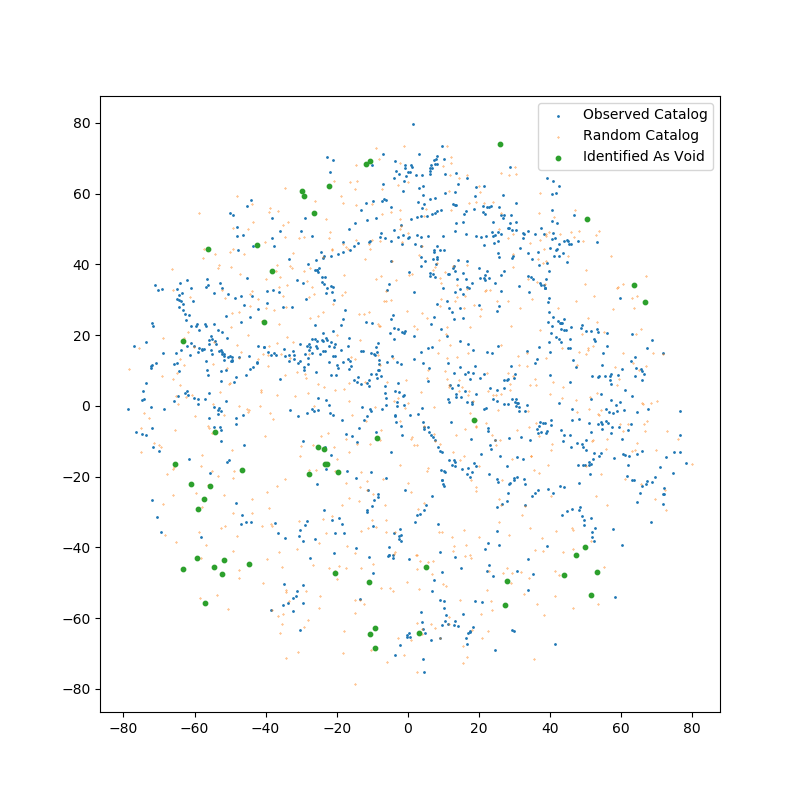

<IPython.core.display.Javascript object>


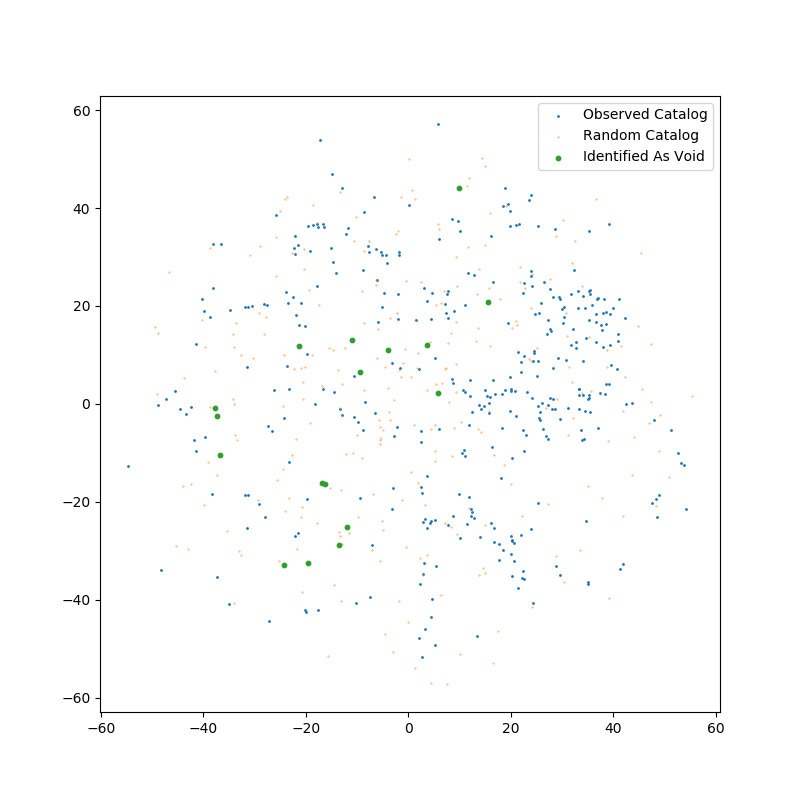

In [64]:
for k in np.linspace(-90,90,9):
    slice_height = 10
    BoxCenter = k

    fig = plt.figure(figsize=[8,8])

    index = np.where( abs(OC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(OC[index,0], OC[index,1], s=1, label="Observed Catalog")

    index = np.where( abs(RC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(RC[index,0], RC[index,1], s=0.1, label="Random Catalog")

    index = np.where( abs(void_cat[:,2] - BoxCenter) < slice_height )        
    plt.scatter(void_cat[index,0], void_cat[index,1], s=10, label="Identified As Void")

    plt.legend(loc=1)

<IPython.core.display.Javascript object>


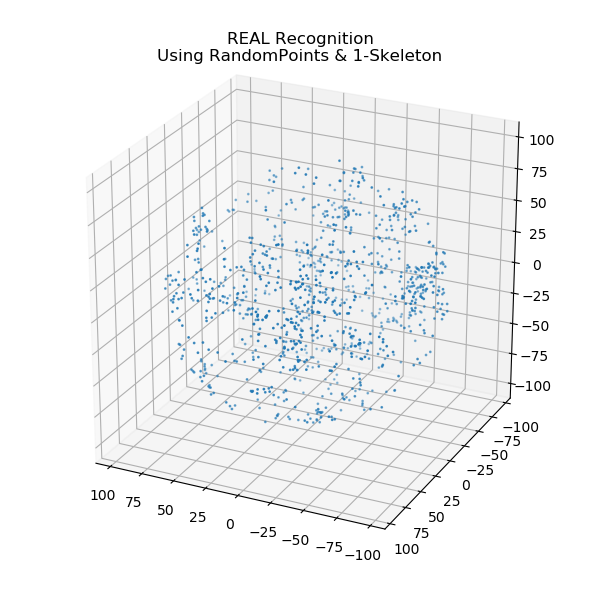

In [65]:
x = void_cat[:,0]
y = void_cat[:,1]
z = void_cat[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=1)
ax.view_init(30, 30)

plt.title(VOID_TYPE +" Recognition" + "\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()

#plt.close()

plt.show()


In [66]:
index=[]

for k in candidates:
    index.extend( list( np.where( BetaSkeleton[:,0] == k)[0].astype(int) ) )

index = list(set(index ) )
index.sort()

# Beta-Skeleton of Voids
VoidsBS = np.array(BetaSkeleton[index]).astype(int)
print(VoidsBS.shape)
print(len(candidates))

(6843, 2)
1062


In [67]:
np.savetxt("BS_of_Voids.bsk", VoidsBS)

In [68]:
candidates.sort()

In [69]:
MasterList = []

for search in candidates:
    
    is_in_master = any( search in sublist for sublist in MasterList)

    #print ( "Is", search, "in MasterList?", is_in_master)
    
    # If is the first time it appears on the MasterList
    if not is_in_master:
        my_list = []

        index = np.where(VoidsBS[:,0] == search)
        my_list.append(search)
        my_list.extend( list(VoidsBS[index,1][0]) )
        my_list.sort()
        MasterList.append(my_list)

    if is_in_master:
        repetitions = []
        
        for k in range(len(MasterList)):
            if(search in MasterList[k]):
                sublist = MasterList[k]
                #print("Si está en la sublista", k, sublist)
                repetitions.append(k)
                
        #print(search, "appears in sublists:" , repetitions)
        

        if ( len(repetitions) == 1 ):
            j = repetitions[0]
            index = np.where(VoidsBS[:,0] == search)
 
            #print("Index:", index)
            my_list = list(VoidsBS[index,1][0])
            my_list.sort()
            MasterList[j].extend(my_list)
        
        elif (len(repetitions) > 1):
            # print("Friend of many friends, n=", len(repetitions))
            my_list = []
            for j in repetitions:
                my_list.extend(MasterList[j])
                MasterList[j]=[]
            my_list.sort()
            MasterList.append(my_list)
            
while( [] in MasterList):
    MasterList.remove([])

In [70]:
for j in range(len(MasterList)):
    MasterList[j] = list( set(MasterList[j]))
    MasterList[j].sort()

In [71]:
to_merge = []

for i in range(len(MasterList)):
    for j in range(len(MasterList)):
        if (j > i):
            aux = [x for x in MasterList[i] if x in MasterList[j]]
            if (len(aux)>0):
                print( i, j, aux)
                to_merge.append([i,j])

1 296 [6623, 8717]
2 104 [7283]
2 186 [7286, 9150]
3 142 [2405]
3 145 [3260, 7780, 7973]
3 244 [8366, 9060, 9712]
3 332 [1613, 8366]
6 13 [7455]
6 69 [1925, 7455]
7 57 [8092]
7 200 [7063]
8 263 [2685, 3489]
9 172 [5014]
9 179 [2993, 5014, 8462]
9 246 [267]
10 31 [6782]
10 183 [376, 8052]
11 201 [712, 9784]
11 301 [7356]
12 66 [2603, 3660]
12 95 [9336]
13 69 [1241, 5300, 7455]
13 204 [619]
14 184 [5291, 9698]
15 278 [4146, 4969, 5808]
15 334 [7389]
17 137 [3407]
17 177 [3851]
18 250 [5169, 6836]
19 244 [4648, 8825]
19 308 [4648]
21 319 [5816, 7018]
22 23 [2492]
22 334 [2600, 5681]
23 244 [3978, 5483, 7104]
23 262 [1018, 7104]
23 332 [3943]
24 150 [1114]
24 164 [1670]
26 27 [4614]
26 40 [4614]
26 46 [3083]
26 215 [1930, 4614, 9383]
27 40 [4614]
27 215 [3304, 4614, 4619, 5796]
28 294 [793, 5497]
31 282 [1541, 4484, 5308, 6443]
32 287 [3772]
33 294 [6947, 8556]
34 285 [701, 4054, 7420]
35 321 [1299, 9506]
36 307 [3078, 6561, 9419]
37 246 [3862, 8940]
38 46 [6320, 7458]
39 40 [8737]
39 53 [

In [72]:
to_merge2 = []
for i in range( len(to_merge)):
    x = to_merge[i][0]
    y = to_merge[i][1]
    
    is_in_list1 = any( x in sublist for sublist in to_merge2 )
    is_in_list2 = any( y in sublist for sublist in to_merge2 )
    
    if( (is_in_list1 == False) & (is_in_list2 == False) ):
        to_merge2.append(to_merge[i])
    
    elif( (is_in_list1 == False) & (is_in_list2 == True) ):
            aux = []
            for j in range(len(to_merge2)):
                if( y in to_merge2[j]):
                    to_merge2[j].append(x)

    elif( (is_in_list1 == True) & (is_in_list2 == False) ):
            aux = []
            for j in range(len(to_merge2)):
                if( x in to_merge2[j]):
                    to_merge2[j].append(y)

    
for x in to_merge2:
    x.sort()
    
print( to_merge2)

[[1, 296], [2, 104, 130, 186, 314, 318], [3, 19, 90, 136, 142, 145, 174, 176, 244, 308, 332], [6, 13, 69, 82, 191, 204, 289], [7, 57, 200, 335], [8, 263], [9, 37, 172, 179, 246], [10, 31, 163, 183, 280, 282], [11, 132, 201, 225, 267, 286, 301], [12, 66, 95, 249], [14, 184], [15, 166, 278, 334], [17, 76, 137, 168, 177], [18, 205, 250], [21, 52, 319], [22, 23, 262], [24, 150, 164], [26, 27, 38, 39, 40, 46, 53, 74, 121, 124, 143, 202, 215, 217, 223, 229, 247, 254, 302, 328], [28, 33, 188, 294], [32, 117, 287, 288, 329, 337], [34, 45, 206, 243, 258, 270, 285, 297, 304], [35, 321], [36, 307], [42, 210], [44, 157, 264, 272], [48, 83, 327], [49, 133, 330], [54, 58, 99, 273], [55, 141, 187], [56, 255, 309], [59, 92], [60, 63, 208, 265, 317], [61, 108, 129, 139], [64, 209, 231, 236], [65, 101, 190, 198, 221, 324], [68, 306], [70, 149, 290, 339], [71, 93, 170, 178, 212, 311], [81, 197, 283], [84, 125, 242], [87, 237], [88, 146, 211, 279], [89, 115], [96, 216, 293], [97, 111], [102, 107], [103, 2

In [74]:
for sublist in to_merge2:
    aux = []
    for x in sublist:
        aux.extend(MasterList[x])
        MasterList[x] = []
    aux.sort()
    MasterList.append(aux)
    
while( [] in MasterList):
    MasterList.remove([])
    

colors = cm.rainbow( np.linspace(0,1, len(MasterList)))



<IPython.core.display.Javascript object>


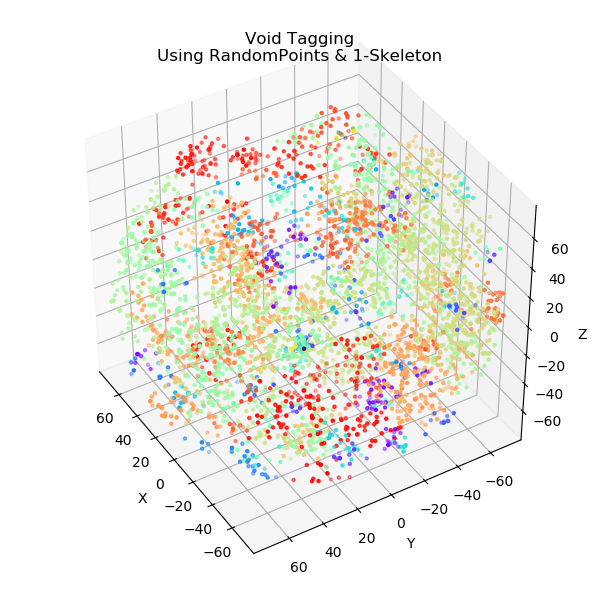

In [75]:
x = RC[:,0]
y = RC[:,1]
z = RC[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

for k in range(len(MasterList)): 
    void = MasterList[k]
    ax.scatter(x[void], y[void], z[void], s=5, c=colors[k])

ax.view_init(15, 30)

plt.title("Void Tagging\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()


plt.savefig("./tagging_voids.pdf", format="pdf")
#plt.close()

plt.show()